In [164]:
# importing requeried libreiers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [165]:
# read file
df=pd.read_csv("churn.csv")

In [166]:
# top five records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [167]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [168]:
df.duplicated().sum()

0

In [169]:
df1=['MonthlyCharges','InternetService', 'SeniorCitizen','OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport','tenure', 'PhoneService','PaperlessBilling', 'PaymentMethod','Contract', 'TotalCharges', 'Churn']

In [170]:
df=df[df1]

In [171]:
df.head()

,MonthlyCharges,InternetService,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,tenure,PhoneService,PaperlessBilling,PaymentMethod,Contract,TotalCharges,Churn
0,29.85,DSL,0,No,Yes,No,No,1,No,Yes,Electronic check,Month-to-month,29.85,No
1,56.95,DSL,0,Yes,No,Yes,No,34,Yes,No,Mailed check,One year,1889.5,No
2,53.85,DSL,0,Yes,Yes,No,No,2,Yes,Yes,Mailed check,Month-to-month,108.15,Yes
3,42.30,DSL,0,Yes,No,Yes,Yes,45,No,No,Bank transfer (automatic),One year,1840.75,No
4,70.70,Fiber optic,0,No,No,No,No,2,Yes,Yes,Electronic check,Month-to-month,151.65,Yes


In [172]:
# to check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MonthlyCharges    7043 non-null   float64
 1   InternetService   7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   tenure            7043 non-null   int64  
 8   PhoneService      7043 non-null   object 
 9   PaperlessBilling  7043 non-null   object 
 10  PaymentMethod     7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  TotalCharges      7043 non-null   object 
 13  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 770.5+ KB


In [173]:
df.duplicated().sum()

61

In [174]:
df.drop_duplicates(inplace=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6982 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MonthlyCharges    6982 non-null   float64
 1   InternetService   6982 non-null   object 
 2   SeniorCitizen     6982 non-null   int64  
 3   OnlineSecurity    6982 non-null   object 
 4   OnlineBackup      6982 non-null   object 
 5   DeviceProtection  6982 non-null   object 
 6   TechSupport       6982 non-null   object 
 7   tenure            6982 non-null   int64  
 8   PhoneService      6982 non-null   object 
 9   PaperlessBilling  6982 non-null   object 
 10  PaymentMethod     6982 non-null   object 
 11  Contract          6982 non-null   object 
 12  TotalCharges      6982 non-null   object 
 13  Churn             6982 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 818.2+ KB


In [176]:
df.duplicated().sum()

0

# Accessing only numerical data

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6982 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MonthlyCharges    6982 non-null   float64
 1   InternetService   6982 non-null   object 
 2   SeniorCitizen     6982 non-null   int64  
 3   OnlineSecurity    6982 non-null   object 
 4   OnlineBackup      6982 non-null   object 
 5   DeviceProtection  6982 non-null   object 
 6   TechSupport       6982 non-null   object 
 7   tenure            6982 non-null   int64  
 8   PhoneService      6982 non-null   object 
 9   PaperlessBilling  6982 non-null   object 
 10  PaymentMethod     6982 non-null   object 
 11  Contract          6982 non-null   object 
 12  TotalCharges      6982 non-null   object 
 13  Churn             6982 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 818.2+ KB


# converting Object into float64

In [178]:
df["TotalCharges"]=df["TotalCharges"].str.isnumeric()

In [179]:
df["TotalCharges"]=df["TotalCharges"].astype("float64")

# seperating catogorical data and numerical data

In [180]:
# Selecting categorical columns (object type)
cat_col = df.select_dtypes(include='object')

# Selecting numerical columns (int64 or float64 type)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Encoding binary variables
#binary_columns = ['PhoneService', 'PaperlessBilling', 'Churn']
#df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Encoding other categorical variables
#categorical_columns = ['InternetService', 'OnlineSecurity', 
 #                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 
  #                      'Contract', 'PaymentMethod']

#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



In [181]:
cat_col

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PhoneService,PaperlessBilling,PaymentMethod,Contract,Churn
0,DSL,No,Yes,No,No,No,Yes,Electronic check,Month-to-month,No
1,DSL,Yes,No,Yes,No,Yes,No,Mailed check,One year,No
2,DSL,Yes,Yes,No,No,Yes,Yes,Mailed check,Month-to-month,Yes
3,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),One year,No
4,Fiber optic,No,No,No,No,Yes,Yes,Electronic check,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,DSL,Yes,No,Yes,Yes,Yes,Yes,Mailed check,One year,No
7039,Fiber optic,No,Yes,Yes,No,Yes,Yes,Credit card (automatic),One year,No
7040,DSL,Yes,No,No,No,No,Yes,Electronic check,Month-to-month,No
7041,Fiber optic,No,No,No,No,Yes,Yes,Mailed check,Month-to-month,Yes


In [182]:
num_col

,MonthlyCharges,SeniorCitizen,tenure,TotalCharges
0,29.85,0,1,0.0
1,56.95,0,34,0.0
2,53.85,0,2,0.0
3,42.30,0,45,0.0
4,70.70,0,2,0.0
...,...,...,...,...
7038,84.80,0,24,0.0
7039,103.20,0,72,0.0
7040,29.60,0,11,0.0
7041,74.40,1,4,0.0


# draw count plot for catogorical data and dist plot for numerical data

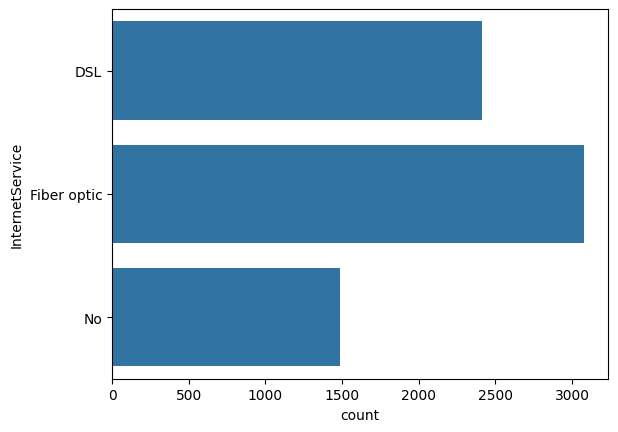

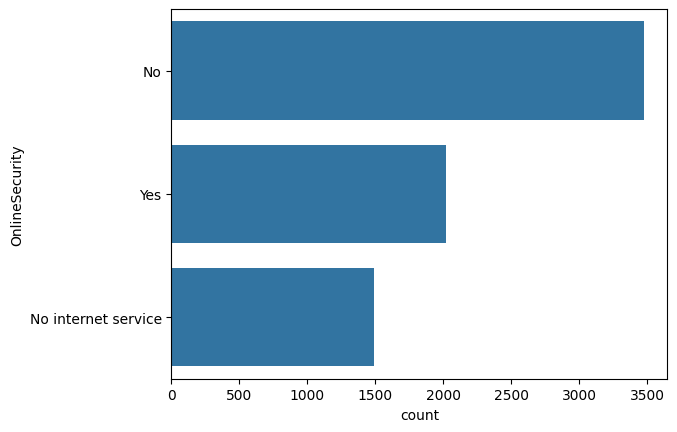

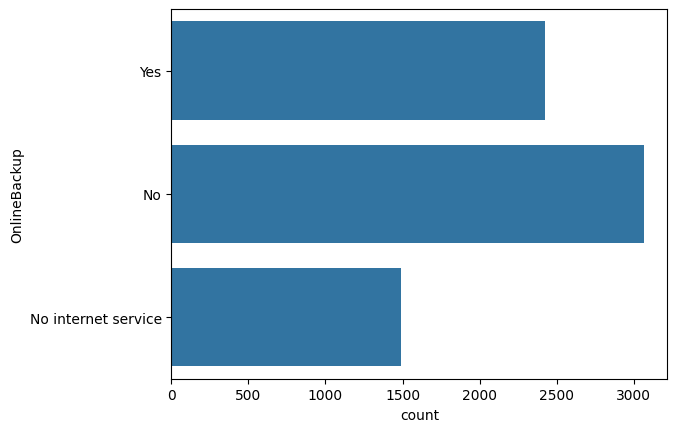

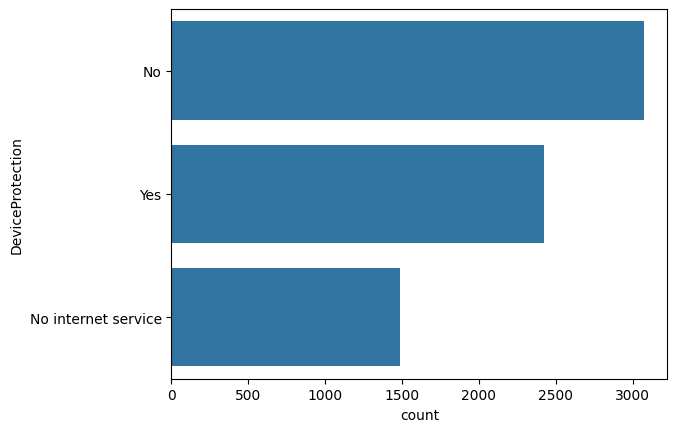

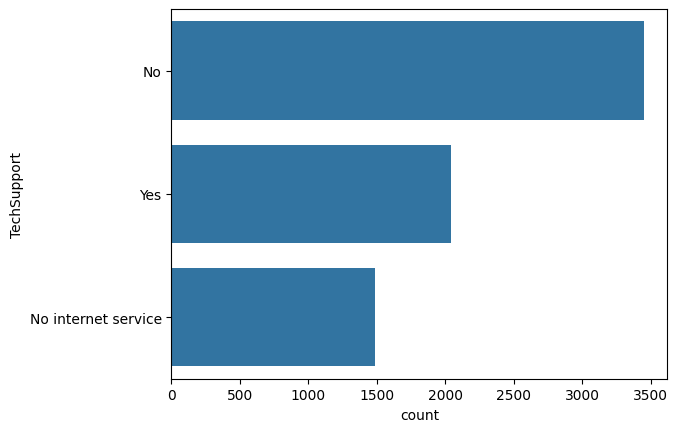

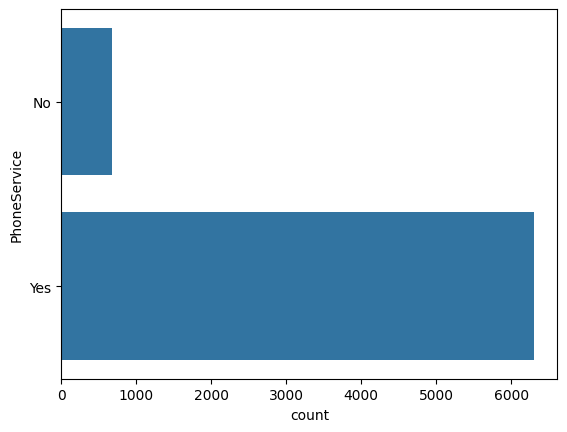

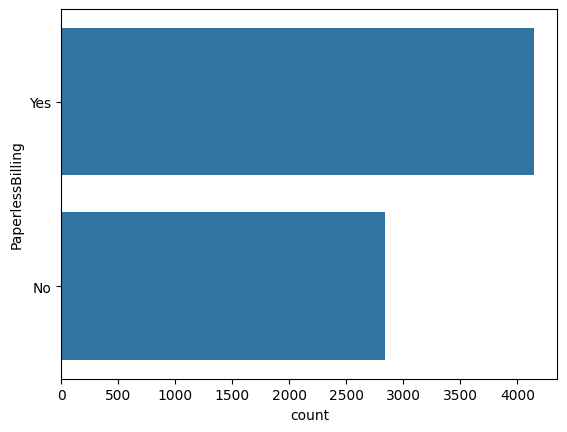

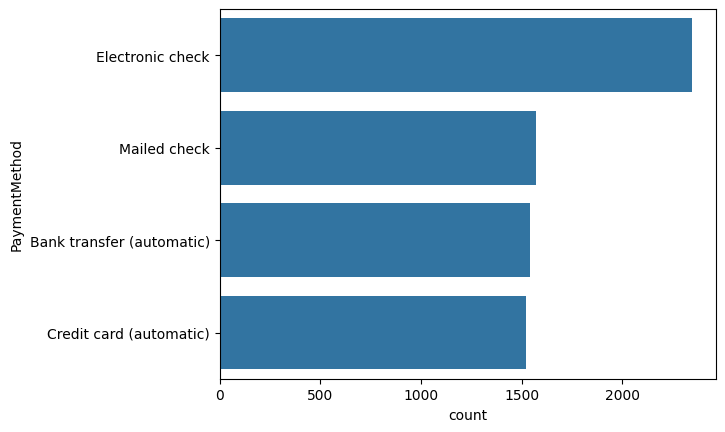

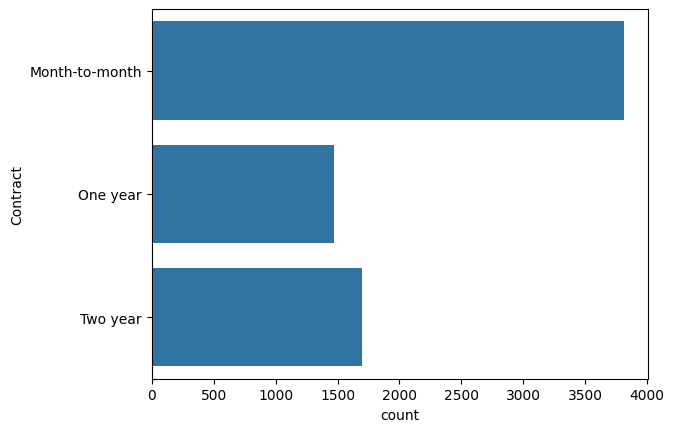

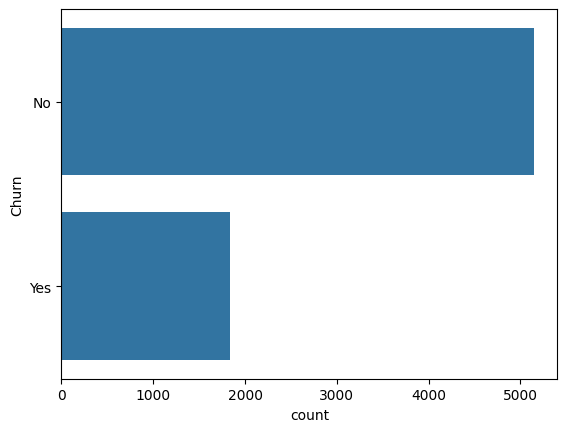

In [187]:
for columns in cat_col:
   sns.countplot(df[columns])
   plt.show()

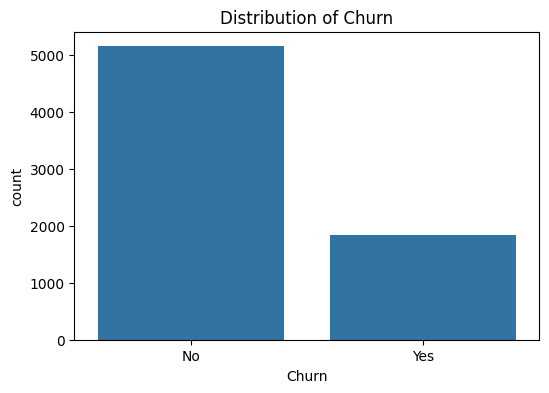

In [190]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Heatmap for feature correlation
#plt.figure(figsize=(12, 8))
#sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
#plt.title('Feature Correlation')
#plt.show()


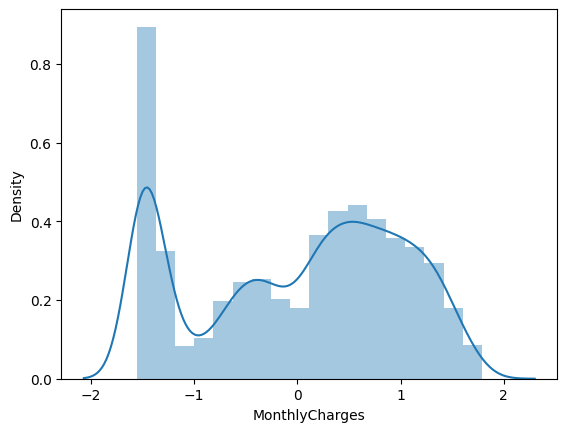

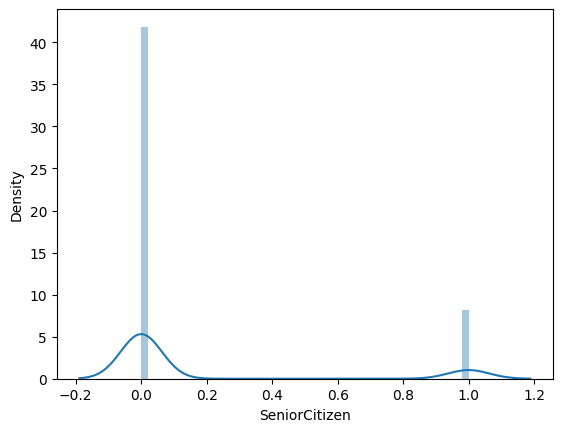

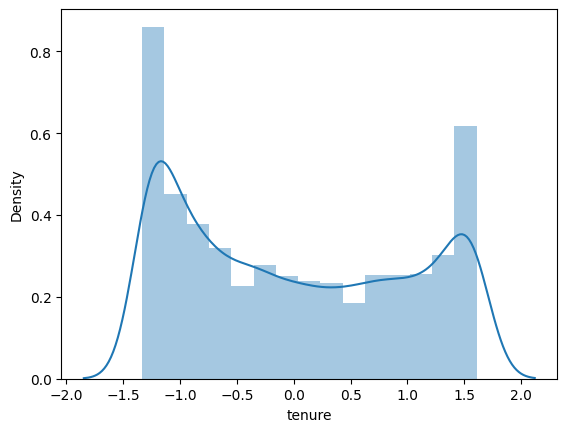

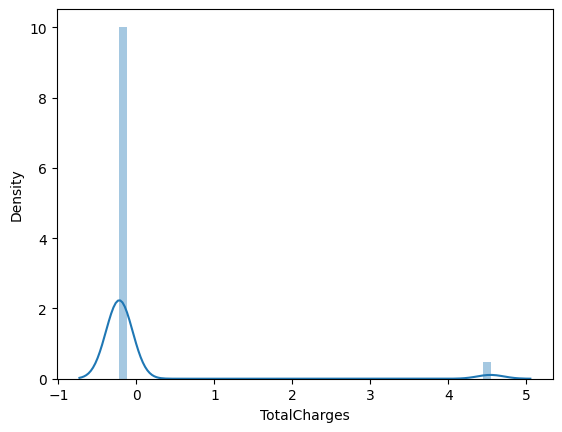

In [191]:
for columns in num_col:
    sns.distplot(df[columns])
    plt.show()

# in our data there is catogorical data we have to change it into numberical for undestanding for computer
# so we have to use lablencoder

In [192]:
from sklearn.preprocessing import LabelEncoder

# Create  object

In [193]:
encode = LabelEncoder()

In [195]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
encode = LabelEncoder()

# Assuming categorical_columns is a list of column names containing categorical variables
for column in cat_col:
    df[column] = encode.fit_transform(df[column])

# Now df[column] contains encoded values for each categorical column


In [196]:
cat_col

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PhoneService,PaperlessBilling,PaymentMethod,Contract,Churn
0,DSL,No,Yes,No,No,No,Yes,Electronic check,Month-to-month,No
1,DSL,Yes,No,Yes,No,Yes,No,Mailed check,One year,No
2,DSL,Yes,Yes,No,No,Yes,Yes,Mailed check,Month-to-month,Yes
3,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),One year,No
4,Fiber optic,No,No,No,No,Yes,Yes,Electronic check,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,DSL,Yes,No,Yes,Yes,Yes,Yes,Mailed check,One year,No
7039,Fiber optic,No,Yes,Yes,No,Yes,Yes,Credit card (automatic),One year,No
7040,DSL,Yes,No,No,No,No,Yes,Electronic check,Month-to-month,No
7041,Fiber optic,No,No,No,No,Yes,Yes,Mailed check,Month-to-month,Yes


In [197]:
df.head()

,MonthlyCharges,InternetService,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,tenure,PhoneService,PaperlessBilling,PaymentMethod,Contract,TotalCharges,Churn
0,-1.171300,0,0,0,2,0,0,-1.292258,0,1,2,0,-0.22024,0
1,-0.268717,0,0,2,0,2,0,0.055323,1,0,3,1,-0.22024,0
2,-0.371965,0,0,2,2,0,0,-1.251422,1,1,3,0,-0.22024,1
3,-0.756645,0,0,2,0,2,2,0.504517,0,0,0,1,-0.22024,0
4,0.189236,1,0,0,0,0,0,-1.251422,1,1,2,0,-0.22024,1


# for convert data int 0,1  we have to use MinMaxScaler(for one columns)or StanderedScaler(for more than one columns)

# indentifing dependent variable and independent variable

In [198]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

# Train Test Split(Spliting data into traing data testing data)

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

# Model Selection

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 


# Creating object of models

In [202]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
AB = AdaBoostClassifier()
DT = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)
XGB = XGBClassifier()
SC = SVC()
RF = RandomForestClassifier(n_estimators=100,max_depth=4)

# fit the model 

In [203]:
LR.fit(x_train,y_train)
KNN.fit(x_train,y_train)
AB.fit(x_train,y_train)
DT.fit(x_train,y_train)
XGB.fit(x_train,y_train)
SC.fit(x_train,y_train)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

# Now we have to predict the model

In [204]:
y_pred_LR = LR.predict(x_test)
y_pred_KNN = KNN.predict(x_test)
y_pred_AB = AB.predict(x_test)
y_pred_DT = DT.predict(x_test)
y_pred_XGB = XGB.predict(x_test)
y_pred_SC = SC.predict(x_test)
y_pred_RF = RF.predict(x_test)

# To find accruracy we have to find classification report 

In [205]:
from sklearn.metrics import classification_report

In [206]:
print("LogisticRegression")
print(classification_report(y_test,y_pred_LR))
print("--------------------------------------------")

print("KNeighborsClassifier")
print(classification_report(y_test,y_pred_KNN))
print("--------------------------------------------")

print("AdaBoostClassifier")
print(classification_report(y_test,y_pred_AB))
print("--------------------------------------------")


print("DecisionTreeClassifier")
print(classification_report(y_test,y_pred_DT))
print("--------------------------------------------")

print("XGBClassifier")
print(classification_report(y_test,y_pred_XGB))
print("--------------------------------------------")


print("SVC")
print(classification_report(y_test,y_pred_SC))
print("--------------------------------------------")

print("RandomForestClassifier")
print(classification_report(y_test,y_pred_RF))
print("--------------------------------------------")



LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1030
           1       0.66      0.54      0.60       367

    accuracy                           0.81      1397
   macro avg       0.76      0.72      0.74      1397
weighted avg       0.80      0.81      0.80      1397

--------------------------------------------
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1030
           1       0.59      0.50      0.55       367

    accuracy                           0.78      1397
   macro avg       0.71      0.69      0.70      1397
weighted avg       0.77      0.78      0.77      1397

--------------------------------------------
AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1030
           1       0.66      0.56      0.60       367

    accuracy                     

# pickle is use for save best model 

In [207]:
import pickle

In [208]:
with open("churn.pkl","wb")as file:
    pickle.dump(LR,file)

In [209]:
# Load the model and inspect its expected input feature count
model = pickle.load(open('churn.pkl', 'rb'))
print(f"Model expects {model.coef_.shape[1]} features")


Model expects 13 features
